In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 

In [ ]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
pip install seaborn


# upload

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ssid_all_london_01.csv to ssid_all_london_01.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ssid_all_london_01.csv']))
df.columns
data01 = df

In [ ]:
data01 = data01.sample(frac = 1)

# for every location remove outliers

In [ ]:
data01.columns

Index(['LocationID', 'SessionID', 'GroupID', 'RecordID', 'Language',
       'Lockdown', 'start_time', 'end_time', 'latitude', 'longitude',
       'Traffic', 'Other', 'Human', 'Natural', 'ISOPleasan', 'ISOEventfu',
       'pleasant', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying',
       'eventful', 'monotonous', 'Overall', 'Appropriat', 'loud', 'sss04',
       'sss05', 'who01', 'who02', 'who03', 'who04', 'who05', 'WHO_Sum', 'Age',
       'Gender', 'occ00___Em', 'occ00___Un', 'occ00___Re', 'occ00___St',
       'occ00___Ot', 'occ00___Ra', 'occ00_othe', 'Occupation', 'edu00',
       'eth00', 'eth00_othe', 'misc00', 'misc03', 'misc03_oth', 'misc04',
       'misc01', 'use00', 'uni00', 'res00___1', 'res00___2', 'res00___3',
       'res00___4', 'res00___5', 'res02', 'paper', 'RecordingL', 'Loudness_N',
       'N10_N90(so', 'Sharpness_', 'Rough_HM_R', 'Rough_HM_A', 'FS_Avg,ari',
       'I_HM_Avg,a', 'Ton_HM_Avg', 'LZeq_L(dB(', 'LAeq_L(A)(', 'LA10_LA90(',
       'LCeq_LAeq(', 'LC10_LC90

In [ ]:
columns_to_keep01 = [ 'latitude', 'longitude','ISOPleasan',  'PARKSDISTAN', 'fountainsvi', 'roadnoiseco', 'treesvisibi', 'DISTANCE']
columns_to_keep02 = [ 'latitude', 'longitude','ISOPleasan','Traffic', 'Natural',  'PARKSDISTAN', 'fountainsvi', 'roadnoiseco', 'treesvisibi', 'DISTANCE']

In [ ]:
data_for_grouping = data01[columns_to_keep02]

In [ ]:
#@ remove outtliers zscore

# Step 1: Group by identical latitude and longitude, and count the number of points in each group
grouped_stats = data_for_grouping.groupby(['latitude', 'longitude']).size().reset_index(name='row_count')

# Step 2: Filter places with 5 or more points
places_with_5_or_more_points = grouped_stats[grouped_stats['row_count'] >= 3]

# Step 3: Iterate over each group and remove outliers in the 'ISOPleasan' column using the Z-score method
for index, group in places_with_5_or_more_points.iterrows():
    # Filter data for the current group
    group_data = data_for_grouping[(data_for_grouping['latitude'] == group['latitude']) &
                                   (data_for_grouping['longitude'] == group['longitude'])]

    # Calculate z-scores for the 'ISOPleasan' column
    z_scores = np.abs((group_data['ISOPleasan'] - group_data['ISOPleasan'].mean()) / group_data['ISOPleasan'].std())

    # Define the threshold for outlier detection (z-score > 2)
    outlier_threshold = 2.0

    # Filter outliers based on the defined threshold
    outliers_to_remove = group_data[z_scores > outlier_threshold]


    # Remove outliers from the original DataFrame
    data_for_grouping = data_for_grouping.drop(outliers_to_remove.index)


print(len(data_for_grouping) - len(data01))



-41


In [ ]:
data_for_grouping = data_for_grouping.dropna()

In [ ]:

data_for_grouping.drop(columns=['latitude', 'longitude'], inplace=True)

# Use dataset without outliers


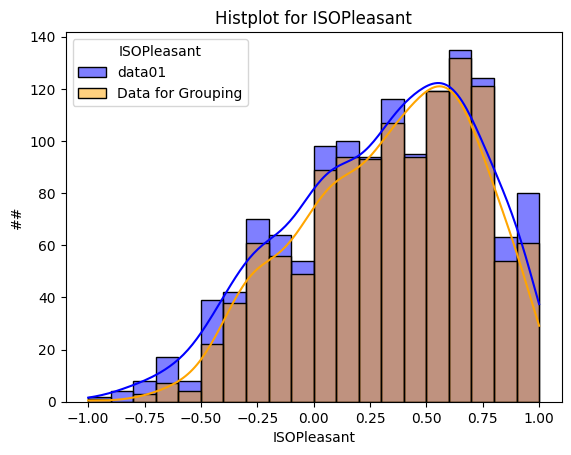

In [ ]:


# Create scatterplot for the current group
plt.figure()
# sns.histplot(data=group_data, x='ISOPleasan')#, y='longitude') #, hue='ISOPleasan')
sns.histplot(data=data01['ISOPleasan'], kde=True, color='blue', label='data01', bins=20) #, stat = 'density')
sns.histplot(data=data_for_grouping['ISOPleasan'], kde=True, color='orange', label='Data for Grouping', bins=20) #, stat = 'density')
plt.title(f"Histplot for ISOPleasant")
plt.xlabel('ISOPleasant')
plt.ylabel('##')
plt.legend(title='ISOPleasant')
plt.show()

In [ ]:
print(data_for_grouping)

      ISOPleasan  PARKSDISTAN  fountainsvi  roadnoiseco  treesvisibi  \
0        -0.2197  -200.000000          0.0    85.000000          1.0   
1        -0.4697  -200.000000          0.0    85.000000          1.0   
2         0.0000  -200.000000          0.0    85.000000          1.0   
3         0.1036  -200.000000          0.0    85.000000          1.0   
4         0.2500  -200.000000          0.0    85.000000          1.0   
...          ...          ...          ...          ...          ...   
1327      0.1768   -29.699896          0.0    60.005878         17.0   
1328      0.1768   -29.699896          0.0    60.005878         17.0   
1329      0.0000   -29.699896          0.0    60.005878         17.0   
1330      0.4268   -29.699896          0.0    60.005878         17.0   
1331     -0.0732   -29.699896          0.0    60.005878         17.0   

       DISTANCE    VISIBLE  
0     62.665019  86.555072  
1     62.665019  86.555072  
2     62.665019  86.555072  
3     62.665019  86

## setup2

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data = data_for_grouping, target = 'ISOPleasan', session_id = 124)

,Description,Value
0,Session id,124
1,Target,ISOPleasan
2,Target type,Regression
3,Original data shape,"(1245, 6)"
4,Transformed data shape,"(1245, 6)"
5,Transformed train set shape,"(871, 6)"
6,Transformed test set shape,"(374, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best_03_avloc = compare_models(exclude = ['lightgbm', 'gbr'],  n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2468,0.0954,0.3084,0.3864,0.1764,1.0946,0.2020
et,Extra Trees Regressor,0.2492,0.0996,0.3150,0.3578,0.1762,1.0931,0.1500
xgboost,Extreme Gradient Boosting,0.2491,0.1002,0.3156,0.3558,0.1764,1.0939,0.0710
ada,AdaBoost Regressor,0.2600,0.1012,0.3178,0.3482,0.1821,1.0900,0.0470
lr,Linear Regression,0.2583,0.1045,0.3226,0.3278,0.1826,1.1420,0.0390
ridge,Ridge Regression,0.2583,0.1045,0.3225,0.3278,0.1826,1.1422,0.0350
lar,Least Angle Regression,0.2583,0.1045,0.3226,0.3278,0.1826,1.1420,0.0450
br,Bayesian Ridge,0.2593,0.1048,0.3230,0.3260,0.1826,1.1539,0.0220
huber,Huber Regressor,0.2572,0.1055,0.3241,0.3211,0.1816,1.1741,0.0470
knn,K Neighbors Regressor,0.2668,0.1101,0.3307,0.2948,0.1882,1.1283,0.0300


Processing:   0%|          | 0/75 [00:00<?, ?it/s]

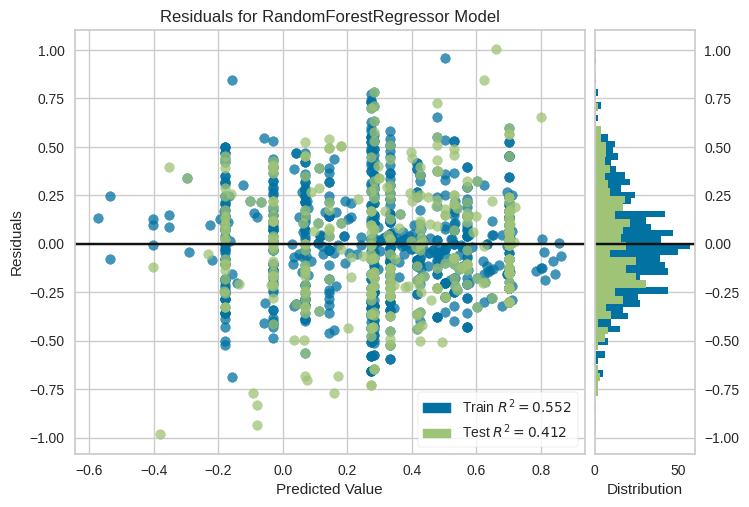

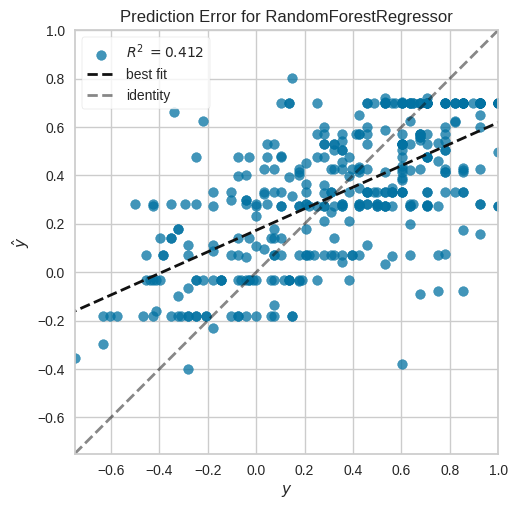

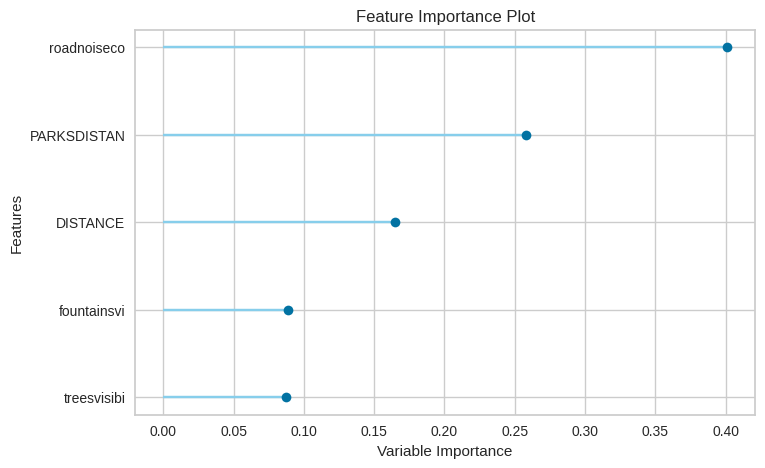

In [ ]:
# plot residuals
plot_model(best_03_avloc[0], plot = 'residuals')
plot_model(best_03_avloc[0], plot = 'error')
plot_model(best_03_avloc[0], plot = 'feature')

In [ ]:
# predict on test set
holdout_pred = predict_model(best_03_avloc[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2423,0.0938,0.3063,0.4119,0.1851,1.0942


In [ ]:
tuned_best_03_avloc = tune_model(best_03_avloc[0], n_iter = 10, optimize = 'MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2685,0.1018,0.3191,0.3318,0.2020,1.2884
1,0.2387,0.0855,0.2924,0.2200,0.1784,1.1990
2,0.2544,0.0918,0.3029,0.4121,0.1848,1.0698
3,0.2410,0.0974,0.3121,0.4215,0.1616,0.9865
4,0.2304,0.0847,0.2911,0.4358,0.1819,0.9334
5,0.2450,0.0885,0.2976,0.4184,0.1752,1.1422
6,0.2389,0.1027,0.3204,0.3494,0.1535,1.3320
7,0.2353,0.0865,0.2941,0.4724,0.1708,1.1418
8,0.2813,0.1178,0.3432,0.4223,0.1871,1.0146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# predict on test set
holdout_pred = predict_model(tuned_best_03_avloc)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2418,0.0929,0.3048,0.4175,0.1781,1.0874


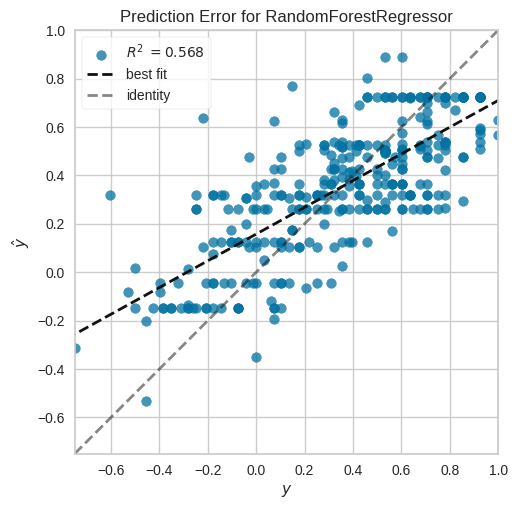

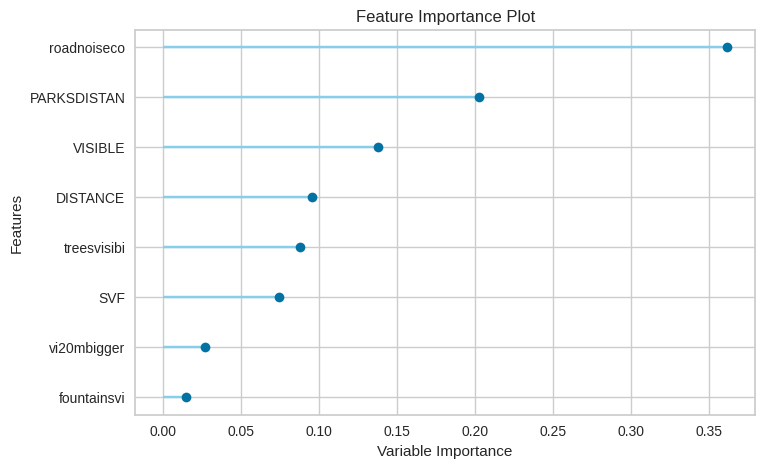

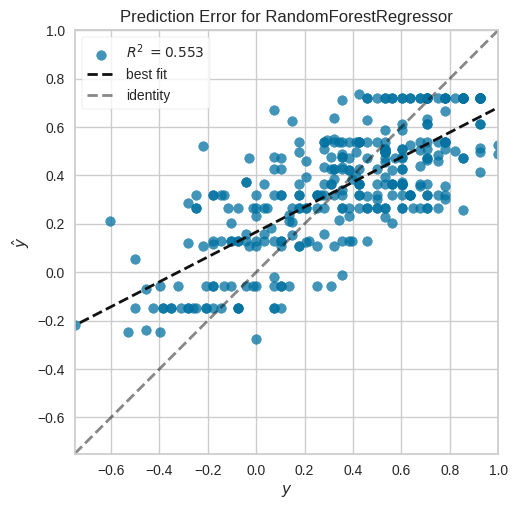

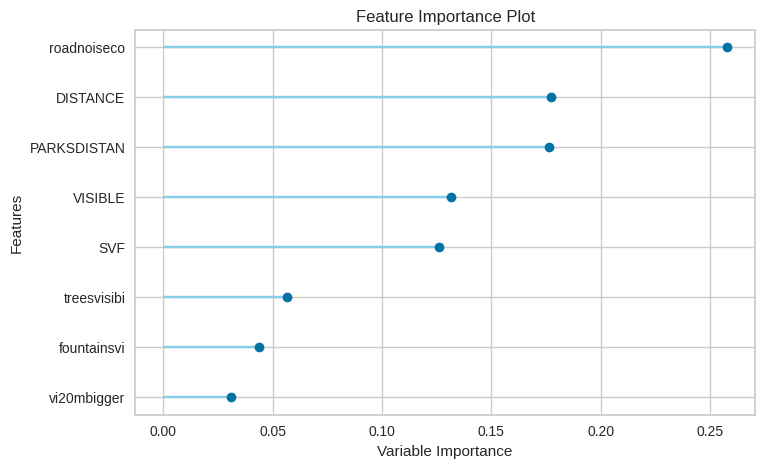

In [ ]:
for model in [best_03_avloc[0],tuned_best_03_avloc]:
  plot_model(model, plot = 'error')
  plot_model(model, plot = 'feature')

# try for different setups


In [ ]:
data_for_grouping

,ISOPleasan,Traffic,Natural,PARKSDISTAN,fountainsvi,roadnoiseco,treesvisibi,DISTANCE
1183,0.2803,4.0,3.0,-2.502285,0.0,55.000000,54.332530,98.591702
270,0.3536,2.0,3.0,4.014696,0.0,59.995332,19.549675,40.810401
195,-0.3536,2.0,2.0,-30.501622,0.0,85.000000,32.320697,79.612697
1050,-0.2803,3.0,1.0,-99.301235,0.0,60.000000,10.762331,40.641449
307,-0.3107,3.0,4.0,4.014696,0.0,59.995332,19.549675,40.810401
...,...,...,...,...,...,...,...,...
1066,0.5607,3.0,3.0,-6.341763,0.0,58.802683,76.820330,98.705819
1052,0.1036,1.0,3.0,-104.104688,0.0,60.000000,12.483798,48.882665
402,0.5303,4.0,3.0,-6.367438,0.0,60.000000,8.084977,63.285793
847,0.2071,3.0,4.0,47.232193,1.0,65.000000,61.918916,99.118656


## Natural

In [ ]:
columns_to_keep_Natural = [ 'Natural',  'PARKSDISTAN', 'fountainsvi', 'treesvisibi', 'DISTANCE']
columns_to_keep_Natural = [ 'Natural',  'PARKSDISTAN', 'DISTANCE']
data_Natural = data_for_grouping[columns_to_keep_Natural]

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data = data_Natural, target = 'Natural', session_id = 125)

,Description,Value
0,Session id,125
1,Target,Natural
2,Target type,Regression
3,Original data shape,"(1244, 3)"
4,Transformed data shape,"(1244, 3)"
5,Transformed train set shape,"(870, 3)"
6,Transformed test set shape,"(374, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


## predict

In [ ]:
# compare baseline models
best_03 = compare_models(exclude = ['lightgbm', 'br', 'gbr'],  n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.7359,0.8980,0.9447,0.4007,0.2814,0.3878,0.1890
et,Extra Trees Regressor,0.7301,0.9030,0.9474,0.3970,0.2822,0.3841,0.1460
xgboost,Extreme Gradient Boosting,0.7303,0.9108,0.9515,0.3925,0.2842,0.3863,0.0700
ada,AdaBoost Regressor,0.7931,0.9290,0.9613,0.3794,0.2863,0.4222,0.0440
lr,Linear Regression,0.8062,0.9714,0.9835,0.3516,0.2943,0.4291,0.7280
ridge,Ridge Regression,0.8062,0.9714,0.9835,0.3516,0.2943,0.4291,0.0420
lar,Least Angle Regression,0.8062,0.9714,0.9835,0.3516,0.2943,0.4291,0.0370
en,Elastic Net,0.8072,0.9720,0.9838,0.3511,0.2945,0.4296,0.0440
huber,Huber Regressor,0.7948,0.9737,0.9845,0.3500,0.2947,0.4199,0.0460
lasso,Lasso Regression,0.8082,0.9739,0.9848,0.3497,0.2949,0.4302,0.0400


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

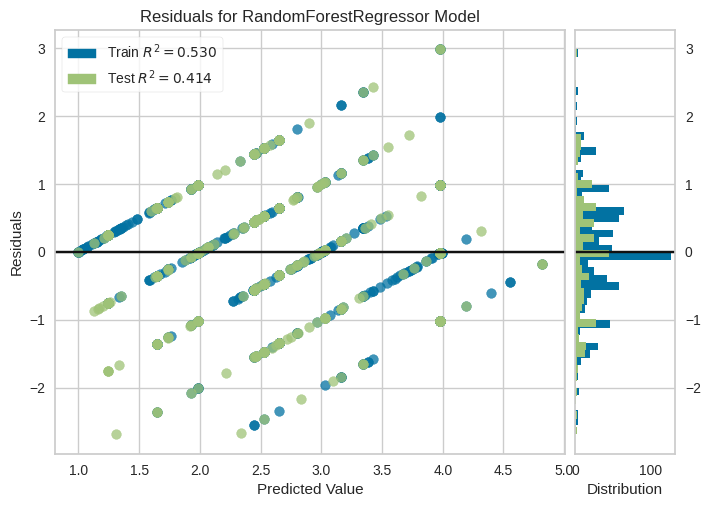

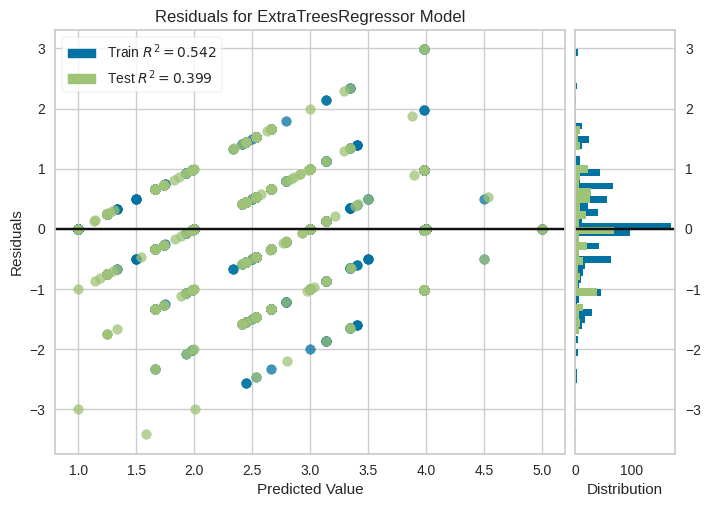

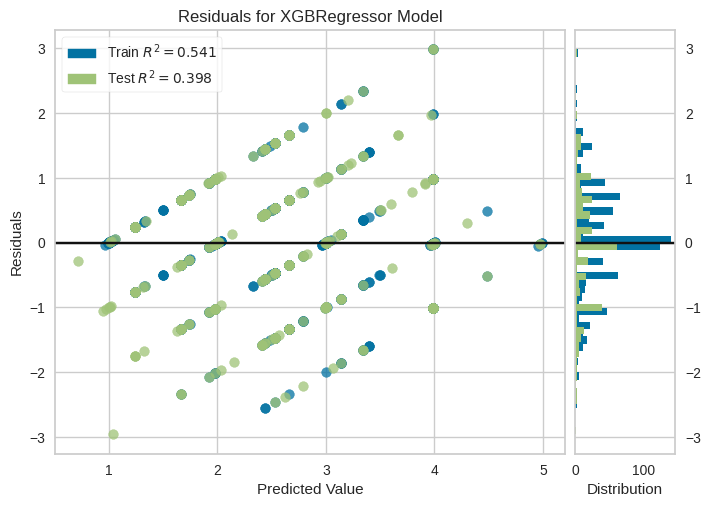

In [ ]:
# plot residuals
plot_model(best_03[0], plot = 'residuals')
plot_model(best_03[1], plot = 'residuals')
plot_model(best_03[2], plot = 'residuals')

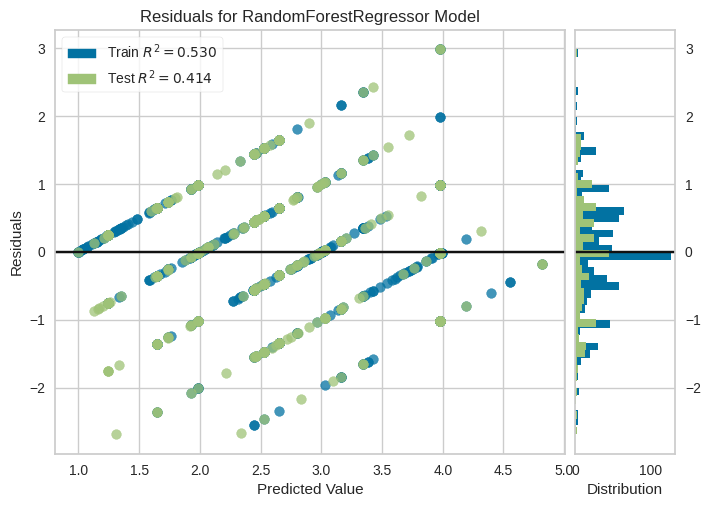

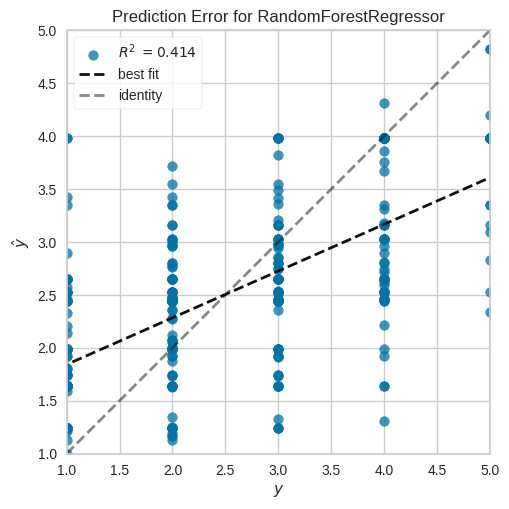

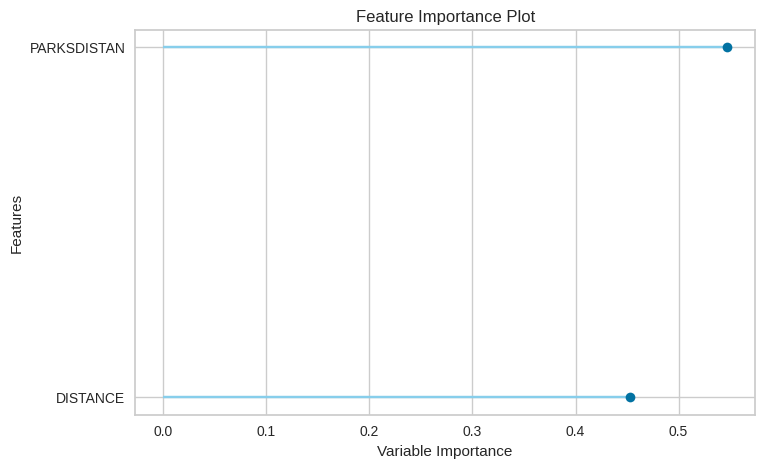

In [ ]:
# plot residuals
plot_model(best_03[0], plot = 'residuals')
plot_model(best_03[0], plot = 'error')
plot_model(best_03[0], plot = 'feature')

In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7781,0.8740,0.9349,0.4047,0.2902,0.4473
1,0.7110,0.7819,0.8842,0.4466,0.2730,0.4081
2,0.8270,0.9789,0.9894,0.2686,0.2781,0.3715
3,0.7745,0.8538,0.9240,0.3898,0.2803,0.4117
4,0.8144,1.0294,1.0146,0.3136,0.3162,0.4457
5,0.8533,1.1437,1.0694,0.2802,0.3100,0.4421
6,0.9116,1.2195,1.1043,0.2779,0.3326,0.5259
7,0.8432,1.0136,1.0068,0.3652,0.2946,0.4307
8,0.7912,0.9426,0.9709,0.3605,0.2907,0.4299


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# predict model on new_data
predictions = predict_model(lr, data = data_Natural)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.8154,0.9962,0.9981,0.3436,0.2987,0.4340


,PARKSDISTAN,DISTANCE,Natural,prediction_label
1183,-2.502285,98.591705,3.0,2.601983
270,4.014696,40.810402,3.0,2.366580
195,-30.501623,79.612694,2.0,2.331006
1050,-99.301231,40.641449,1.0,1.701941
307,4.014696,40.810402,4.0,2.366580


In [ ]:
data_for_grouping_Natural = data_for_grouping.merge(predictions[['prediction_label']], left_index=True, right_index=True, suffixes=('', '_Natural'))
data_for_grouping_Natural.rename(columns={"prediction_label": "pred_natural"})

,ISOPleasan,Traffic,Natural,PARKSDISTAN,fountainsvi,roadnoiseco,treesvisibi,DISTANCE,pred_natural
1183,0.2803,4.0,3.0,-2.502285,0.0,55.000000,54.332530,98.591702,2.601983
270,0.3536,2.0,3.0,4.014696,0.0,59.995332,19.549675,40.810401,2.366580
195,-0.3536,2.0,2.0,-30.501622,0.0,85.000000,32.320697,79.612697,2.331006
1050,-0.2803,3.0,1.0,-99.301235,0.0,60.000000,10.762331,40.641449,1.701941
307,-0.3107,3.0,4.0,4.014696,0.0,59.995332,19.549675,40.810401,2.366580
...,...,...,...,...,...,...,...,...,...
1066,0.5607,3.0,3.0,-6.341763,0.0,58.802683,76.820330,98.705819,2.577861
1052,0.1036,1.0,3.0,-104.104688,0.0,60.000000,12.483798,48.882665,1.710625
402,0.5303,4.0,3.0,-6.367438,0.0,60.000000,8.084977,63.285793,2.407725
847,0.2071,3.0,4.0,47.232193,1.0,65.000000,61.918916,99.118656,2.924067


## predict ISOPleasant with this

In [ ]:
data_for_grouping_Natural.columns

Index(['ISOPleasan', 'Traffic', 'Natural', 'PARKSDISTAN', 'fountainsvi',
       'roadnoiseco', 'treesvisibi', 'DISTANCE', 'prediction_label'],
      dtype='object')

In [ ]:
columns_to_keep_Pleasant = [ 'ISOPleasan',  'prediction_label']
data_Natural_Pleasant = data_for_grouping_Natural[columns_to_keep_Pleasant]

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data = data_Natural_Pleasant, target = 'ISOPleasan', session_id = 126)

,Description,Value
0,Session id,126
1,Target,ISOPleasan
2,Target type,Regression
3,Original data shape,"(1244, 2)"
4,Transformed data shape,"(1244, 2)"
5,Transformed train set shape,"(870, 2)"
6,Transformed test set shape,"(374, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best_03 = compare_models(exclude = ['lightgbm', 'br', 'gbr'],  n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2491,0.0992,0.3147,0.3332,0.1836,1.1581,0.3250
ada,AdaBoost Regressor,0.2570,0.1021,0.3184,0.3209,0.1863,1.1414,0.0460
et,Extra Trees Regressor,0.2487,0.1021,0.3194,0.3113,0.1849,1.1792,0.2090
dt,Decision Tree Regressor,0.2524,0.1066,0.3261,0.2811,0.1879,1.1899,0.0240
xgboost,Extreme Gradient Boosting,0.2539,0.1066,0.3258,0.2796,0.1877,1.2171,0.0580
knn,K Neighbors Regressor,0.2589,0.1100,0.3310,0.2678,0.1902,1.1548,0.0310
lr,Linear Regression,0.2744,0.1157,0.3393,0.2308,0.1882,1.2114,0.8290
ridge,Ridge Regression,0.2744,0.1157,0.3393,0.2308,0.1882,1.2113,0.0250
lar,Least Angle Regression,0.2744,0.1157,0.3393,0.2308,0.1882,1.2114,0.0240
omp,Orthogonal Matching Pursuit,0.2744,0.1157,0.3393,0.2308,0.1882,1.2114,0.0230


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

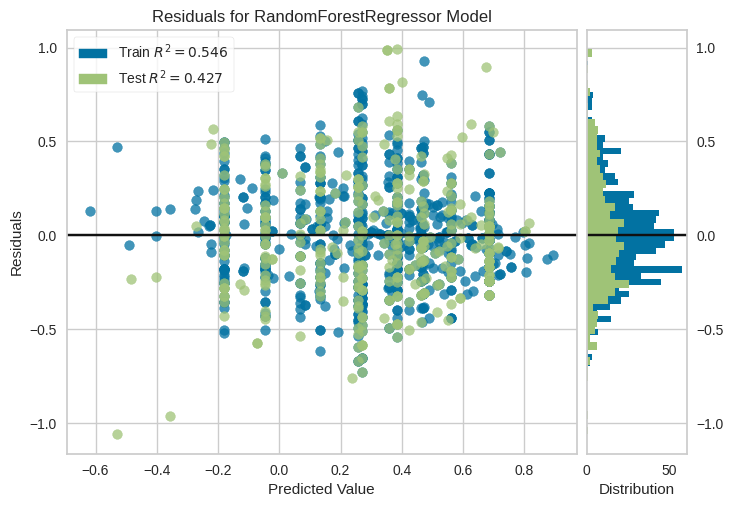

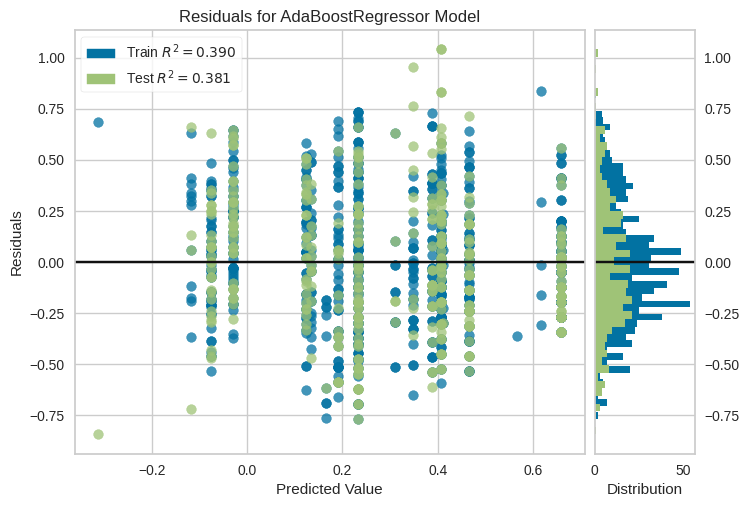

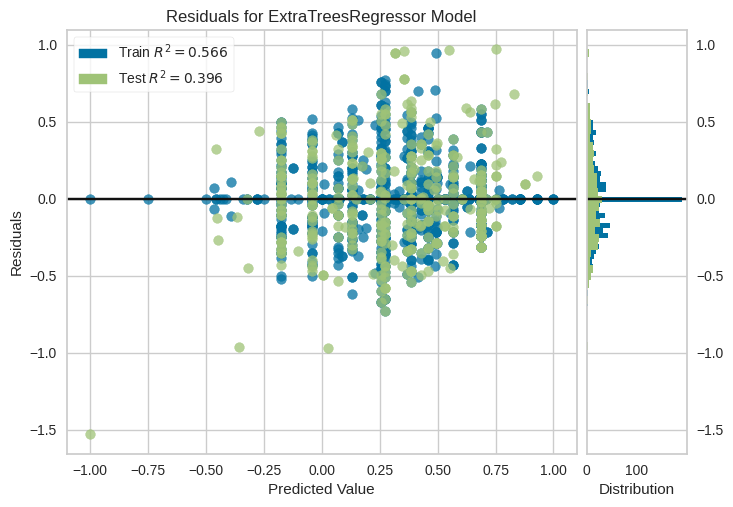

In [ ]:
# plot residuals
plot_model(best_03[0], plot = 'residuals')
plot_model(best_03[1], plot = 'residuals')
plot_model(best_03[2], plot = 'residuals')

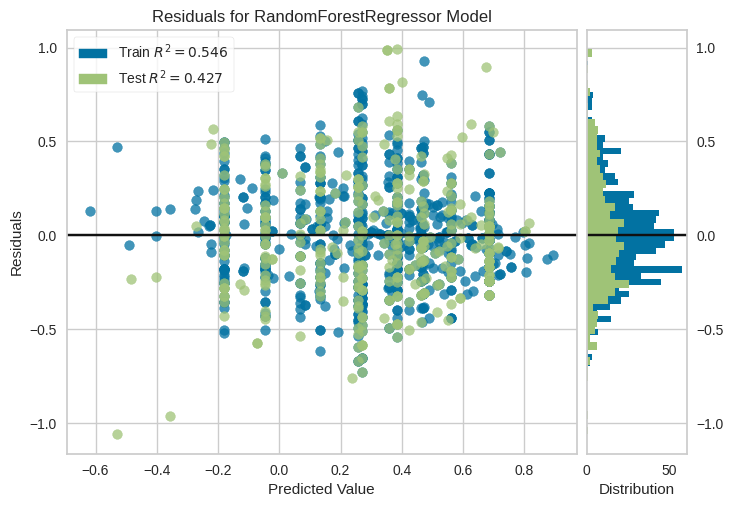

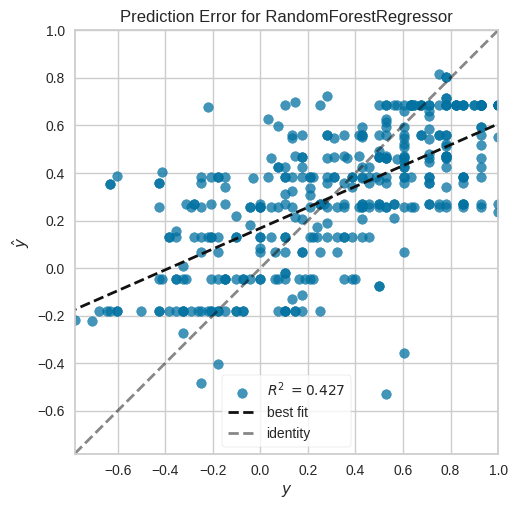

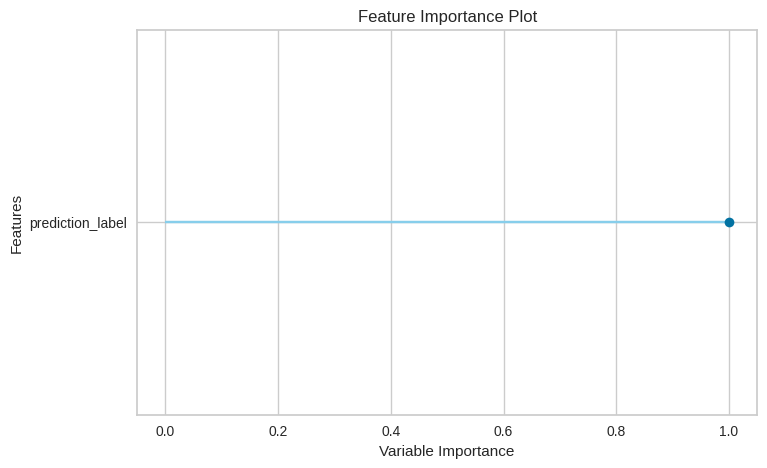

In [ ]:
# plot residuals
plot_model(best_03[0], plot = 'residuals')
plot_model(best_03[0], plot = 'error')
plot_model(best_03[0], plot = 'feature')

# use whole dataset
works less good


In [ ]:
print(list(data01.columns))

['LocationID', 'SessionID', 'GroupID', 'RecordID', 'Language', 'Lockdown', 'start_time', 'end_time', 'latitude', 'longitude', 'Traffic', 'Other', 'Human', 'Natural', 'ISOPleasan', 'ISOEventfu', 'pleasant', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying', 'eventful', 'monotonous', 'Overall', 'Appropriat', 'loud', 'sss04', 'sss05', 'who01', 'who02', 'who03', 'who04', 'who05', 'WHO_Sum', 'Age', 'Gender', 'occ00___Em', 'occ00___Un', 'occ00___Re', 'occ00___St', 'occ00___Ot', 'occ00___Ra', 'occ00_othe', 'Occupation', 'edu00', 'eth00', 'eth00_othe', 'misc00', 'misc03', 'misc03_oth', 'misc04', 'misc01', 'use00', 'uni00', 'res00___1', 'res00___2', 'res00___3', 'res00___4', 'res00___5', 'res02', 'paper', 'RecordingL', 'Loudness_N', 'N10_N90(so', 'Sharpness_', 'Rough_HM_R', 'Rough_HM_A', 'FS_Avg,ari', 'I_HM_Avg,a', 'Ton_HM_Avg', 'LZeq_L(dB(', 'LAeq_L(A)(', 'LA10_LA90(', 'LCeq_LAeq(', 'LC10_LC90(', 'RA_2D_cp(c', 'PA(Zwicker', 'fid', 'NoiseClass', 'NoiseCla_1', 'OBJECTID', 'ID', 'A_pred', 'A

In [ ]:
columns_to_keep = ['ISOPleasan',  'PARKSDISTAN', 'fountainsvi', 'roadnoiseco', 'treesvisibi', 'vi20mbigger', 'DISTANCE', 'SVF', 'VISIBLE']


# Drop the specified columns
# data.drop(columns=columns_to_drop, inplace=True)
data = data01[columns_to_keep]

print(data)

      ISOPleasan  PARKSDISTAN  fountainsvi  roadnoiseco  treesvisibi  \
680       0.6768   183.458088          1.0    60.000000    12.435608   
1047      0.2803   -89.183494          0.0    60.000000    14.296106   
310       0.1339    -6.367438          0.0    60.000000     8.084977   
31        0.3964  -200.000000          0.0    85.000000     1.000000   
546       0.9268   183.458088          1.0    60.000000    12.435608   
...          ...          ...          ...          ...          ...   
1238      0.2803   -16.591161          0.0    60.000000    14.977410   
1147      0.3536    -6.341763          0.0    58.802683    76.820330   
106       0.0429   -30.501622          0.0    85.000000    32.320697   
1041      0.6768  -101.412744          0.0    60.000000    12.040337   
1122      0.4571    -6.341763          0.0    58.802683    76.820330   

      vi20mbigger    DISTANCE       SVF     VISIBLE  
680      1.000000  100.000000  1.000000  100.000000  
1047     0.737799   44.7123

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
columns_with_na = data.columns[data.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)


Columns with NaN values: ['roadnoiseco']


In [ ]:
data = data.dropna()

In [ ]:
data

,ISOPleasan,PARKSDISTAN,fountainsvi,roadnoiseco,treesvisibi,vi20mbigger,DISTANCE,SVF,VISIBLE
680,0.6768,183.458088,1.0,60.000000,12.435608,1.000000,100.000000,1.000000,100.000000
1047,0.2803,-89.183494,0.0,60.000000,14.296106,0.737799,44.712344,0.569519,56.644643
310,0.1339,-6.367438,0.0,60.000000,8.084977,1.000000,63.285793,0.929281,86.078231
31,0.3964,-200.000000,0.0,85.000000,1.000000,0.969707,62.665019,0.930022,86.555072
546,0.9268,183.458088,1.0,60.000000,12.435608,1.000000,100.000000,1.000000,100.000000
...,...,...,...,...,...,...,...,...,...
1238,0.2803,-16.591161,0.0,60.000000,14.977410,0.983985,62.105989,0.857115,80.849240
1147,0.3536,-6.341763,0.0,58.802683,76.820330,1.000000,98.705819,0.988635,97.050978
106,0.0429,-30.501622,0.0,85.000000,32.320697,1.000000,79.612697,0.967312,91.997341
1041,0.6768,-101.412744,0.0,60.000000,12.040337,0.832274,47.347831,0.628633,61.282286


## set up

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data = data, target = 'ISOPleasan', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ISOPleasan
2,Target type,Regression
3,Original data shape,"(1286, 9)"
4,Transformed data shape,"(1286, 9)"
5,Transformed train set shape,"(900, 9)"
6,Transformed test set shape,"(386, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best_03 = compare_models(exclude = ['lightgbm', 'br', 'gbr'],  n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2656,0.1152,0.3389,0.3392,0.1882,1.2065,0.3800
ada,AdaBoost Regressor,0.2791,0.1192,0.3447,0.3163,0.1962,1.1507,0.0460
et,Extra Trees Regressor,0.2675,0.1191,0.3446,0.3153,0.1884,1.2073,0.1620
ridge,Ridge Regression,0.2775,0.1222,0.3489,0.3005,0.1910,1.2375,0.0230
xgboost,Extreme Gradient Boosting,0.2696,0.1225,0.3495,0.2926,0.1888,1.2135,0.0890
huber,Huber Regressor,0.2785,0.1257,0.3539,0.2805,0.1929,1.2790,0.0570
en,Elastic Net,0.2879,0.1285,0.3578,0.2648,0.1890,1.2145,0.0220
knn,K Neighbors Regressor,0.2844,0.1316,0.3622,0.2466,0.2089,1.3082,0.0300
omp,Orthogonal Matching Pursuit,0.2976,0.1361,0.3682,0.2206,0.1951,1.2017,0.0220
lasso,Lasso Regression,0.2981,0.1362,0.3683,0.2204,0.1950,1.1948,0.0240


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

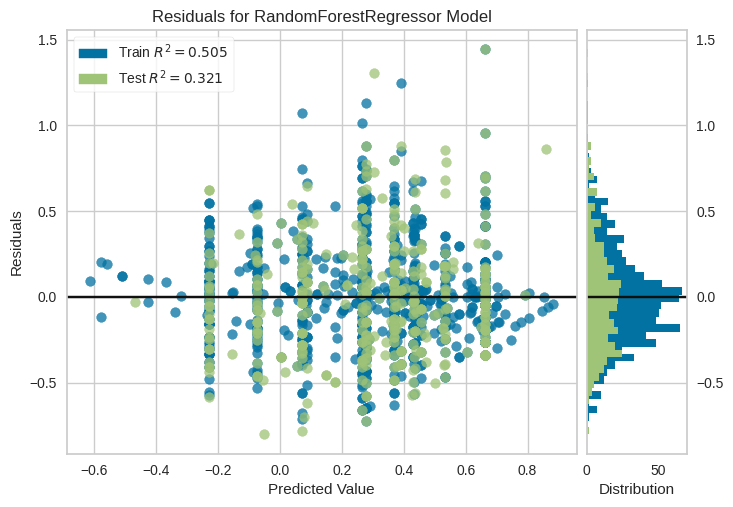

In [ ]:
# plot residuals
plot_model(best_03[0], plot = 'residuals')

In [ ]:
# predict on test set
holdout_pred = predict_model(best_03[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2631,0.1142,0.3379,0.3214,0.1867,1.1799


#statistics
datafor grouping

In [ ]:
data_for_grouping

,ISOPleasan,PARKSDISTAN,fountainsvi,roadnoiseco,treesvisibi,SVF,VISIBLE
519,0.7071,200.000000,2.0,60.000000,0.000000,1.000249,100.061538
655,0.6036,183.458088,1.0,60.000000,12.435608,1.000000,100.000000
46,0.0000,-200.000000,0.0,85.000000,1.000000,0.930022,86.555072
869,-0.6339,4.278720,1.0,55.001316,35.027439,0.738470,70.566873
967,0.5303,1.333550,1.0,57.754907,41.451145,0.760090,72.629430
...,...,...,...,...,...,...,...
697,0.7803,183.458088,1.0,60.000000,12.435608,1.000000,100.000000
1330,0.4268,-29.699896,0.0,60.005878,17.000000,0.911364,84.273617
588,0.7071,183.458088,1.0,60.000000,12.435608,1.000000,100.000000
460,0.7803,-27.292934,1.0,50.000000,0.000000,0.474979,52.205094


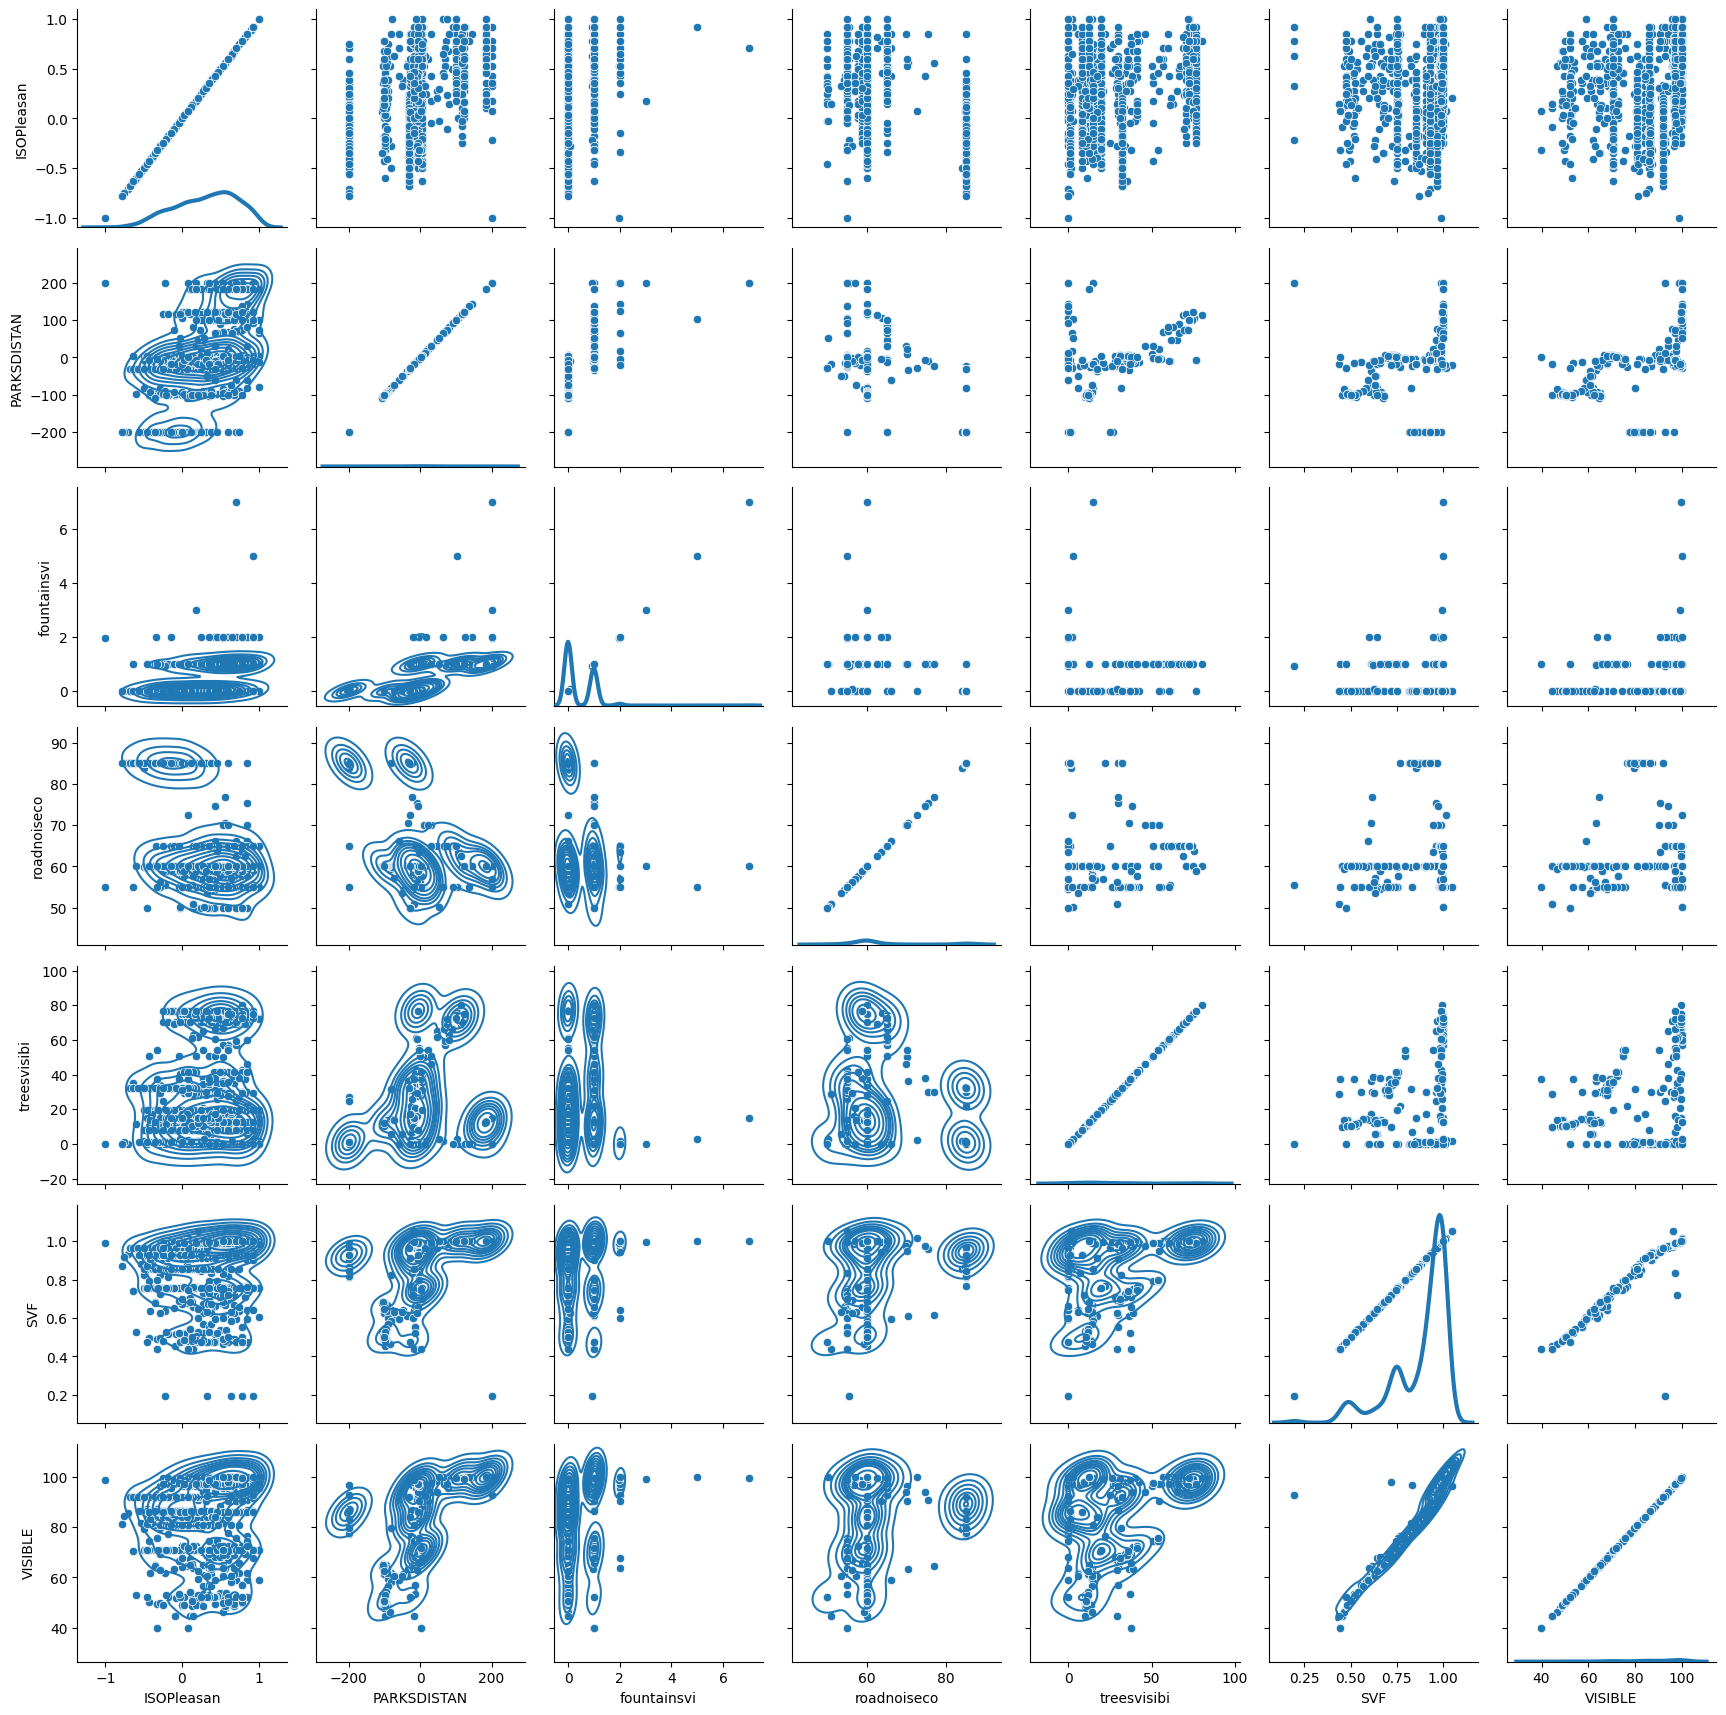

In [ ]:
g = sns.PairGrid(data_for_grouping)
g.map(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [ ]:
data_for_grouping.columns

Index(['ISOPleasan', 'PARKSDISTAN', 'fountainsvi', 'roadnoiseco',
       'treesvisibi', 'SVF', 'VISIBLE'],
      dtype='object')

<Axes: xlabel='ISOPleasan', ylabel='VISIBLE'>

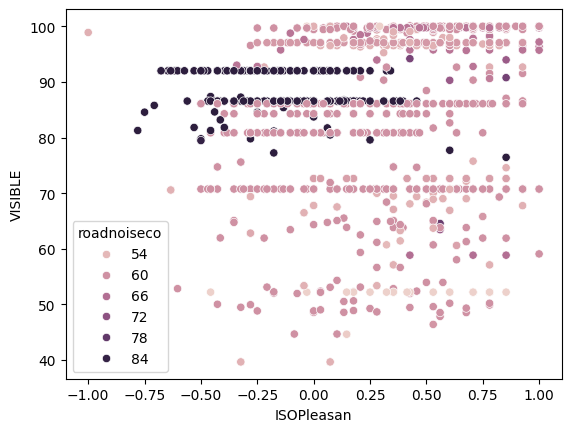

In [ ]:
sns.scatterplot(data=data_for_grouping, x= 'ISOPleasan', y = 'VISIBLE', hue = 'roadnoiseco',  alpha = 1)

<Axes: xlabel='ISOPleasan', ylabel='roadnoiseco'>

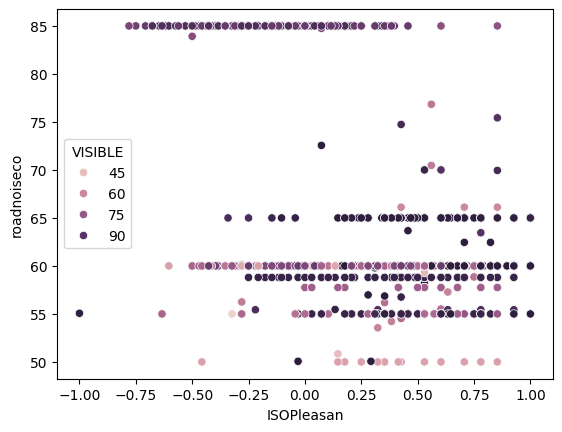

In [ ]:
sns.scatterplot(data=data_for_grouping, x= 'ISOPleasan', y = 'roadnoiseco', hue = 'VISIBLE',  alpha = 1)


<Axes: xlabel='SVF', ylabel='roadnoiseco'>

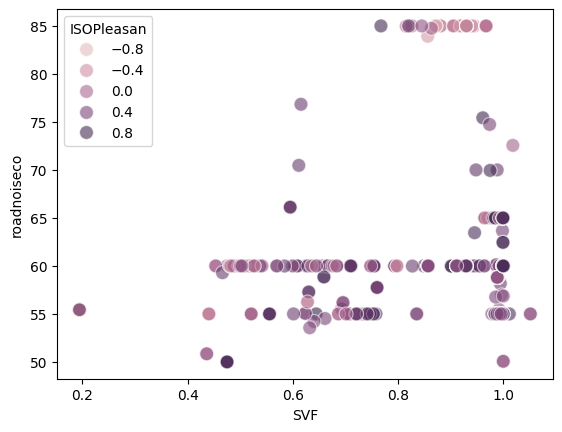

In [ ]:
sns.scatterplot(data=data_for_grouping, x= 'SVF', y = 'roadnoiseco', hue = 'ISOPleasan',  alpha = 0.6,  s= 100)

<Axes: xlabel='ISOPleasan', ylabel='SVF'>

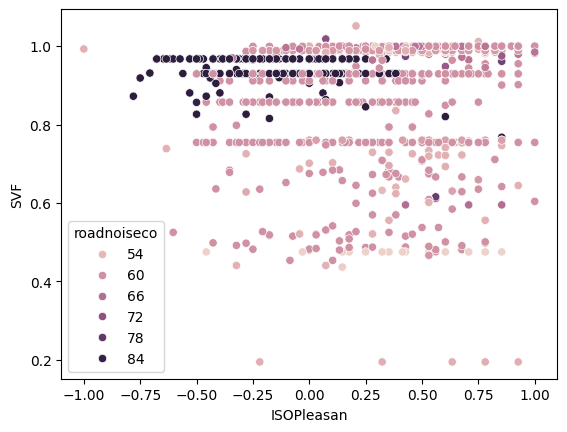

In [ ]:
sns.scatterplot(data=data_for_grouping, x= 'ISOPleasan', y = 'SVF', hue = 'roadnoiseco',  alpha = 1)

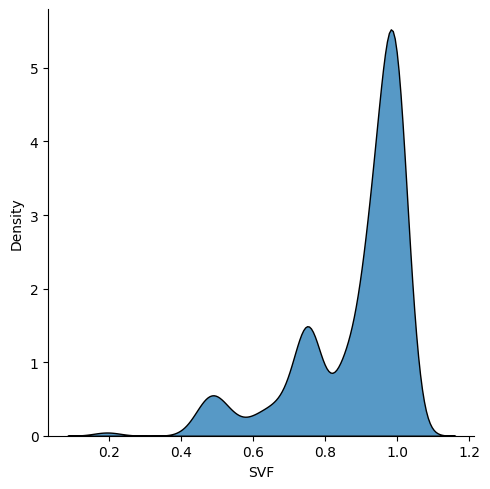

In [ ]:
sns.displot(data=data_for_grouping, x="SVF" , multiple="stack", kind="kde")